In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns


data_player = pd.read_csv('./datos/player_valuations.csv')
data_player

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
464777,1073997,2024-01-08,150000,18,L1
464778,361508,2024-01-10,300000,39,L1
464779,705337,2024-01-10,125000,26459,UKR1
464780,800946,2024-01-10,1000000,79,L1


In [5]:
#Cambiar Nombres de Columnas
data_player.rename(columns={"market_value_in_eur": 'precio_en_euros'}, inplace=True)
data_player.rename(columns={"player_id": 'id_jugador'}, inplace=True)
data_player.rename(columns={"date": 'fecha'}, inplace=True)
data_player.rename(columns={"current_club_id": 'id_actual_club'}, inplace=True)
data_player.rename(columns={"player_club_domestic_competition_id": 'id_jugador_competicion'}, inplace=True)


In [6]:
#Ordenar De Forma Descendente

data_player_sort = data_player.sort_values(by='precio_en_euros', ascending=False)
data_player_sort


,id_jugador,fecha,precio_en_euros,id_actual_club,id_jugador_competicion
292158,342229,2019-12-19,200000000,583,FR1
268400,342229,2019-06-03,200000000,583,FR1
252371,342229,2018-12-17,200000000,583,FR1
234794,28003,2018-05-30,180000000,583,FR1
252068,68290,2018-12-17,180000000,583,FR1
...,...,...,...,...,...
452456,58567,2023-08-25,10000,1506,TR1
452457,402536,2023-08-25,10000,114,TR1
452458,485578,2023-08-25,10000,126,TR1
452810,388361,2023-09-15,10000,126,TR1


In [7]:
#Ordenar De Forma Ascendente
data_player_ordered = data_player.sort_values(by='precio_en_euros', ascending=True)
data_player_ordered

,id_jugador,fecha,precio_en_euros,id_actual_club,id_jugador_competicion
15338,60096,2008-03-17,0,2696,RU1
448323,876866,2023-06-26,10000,19789,TR1
438787,303456,2023-06-12,10000,157,BE1
379995,4190,2021-12-28,10000,603,GB1
345675,162957,2021-03-01,10000,398,IT1
...,...,...,...,...,...
328329,342229,2020-10-15,180000000,583,FR1
268021,68290,2019-06-03,180000000,583,FR1
268400,342229,2019-06-03,200000000,583,FR1
292158,342229,2019-12-19,200000000,583,FR1


In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_player_ordered.describe()

,id_jugador,precio_en_euros,id_actual_club
count,464782.000,464782.000,464782.000
mean,204484.605,2359657.620,4060.930
std,186128.543,6666213.585,9516.104
min,10.000,0.000,3.000
25%,56841.000,200000.000,369.000
50%,149526.000,500000.000,1010.000
75%,297772.000,1500000.000,2969.000
max,1186012.000,200000000.000,83678.000


In [9]:
data_player_ordered['precio_en_euros'].mean()


np.float64(2359657.620129437)

In [19]:
data_player_ordered['precio_en_euros'].median()

np.float64(500000.0)

In [21]:
data_player_ordered['precio_en_euros'].mode()

0    300000
Name: precio_en_euros, dtype: int64

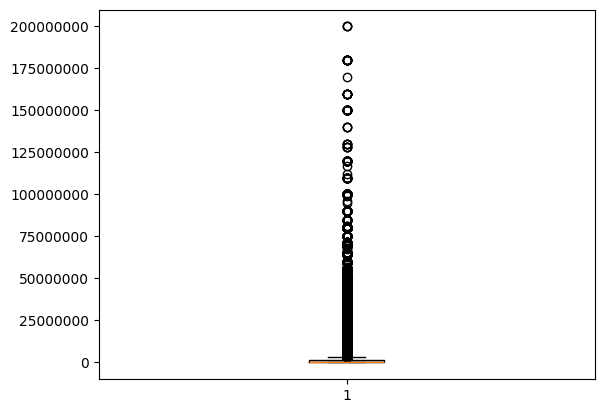

In [10]:
#Graficos
plt.ticklabel_format(style='plain', axis='y')

plt.boxplot(data_player_ordered['precio_en_euros'])
plt.show()

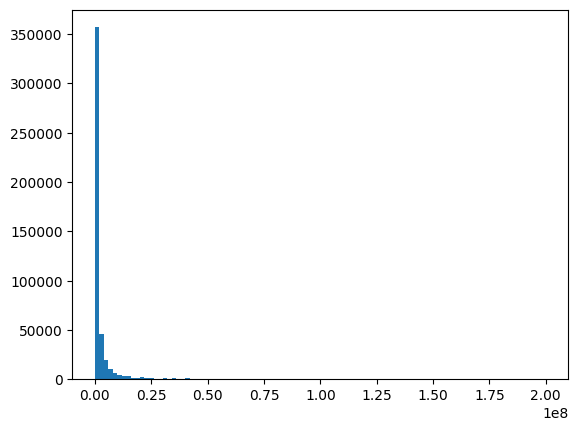

In [11]:
plt.hist(data_player_ordered['precio_en_euros'], bins=100)
plt.show()


In [12]:
#
Q1 = data_player_ordered['precio_en_euros'].quantile(0.25)
Q3 = data_player_ordered['precio_en_euros'].quantile(0.75)
IQR = Q3 - Q1

#Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [13]:
#
df = data_player_ordered
df_filtrado = df[(df['precio_en_euros'] >= lower_bound) & (df['precio_en_euros'] <= upper_bound)]
df_filtrado


,id_jugador,fecha,precio_en_euros,id_actual_club,id_jugador_competicion
15338,60096,2008-03-17,0,2696,RU1
448323,876866,2023-06-26,10000,19789,TR1
438787,303456,2023-06-12,10000,157,BE1
379995,4190,2021-12-28,10000,603,GB1
345675,162957,2021-03-01,10000,398,IT1
...,...,...,...,...,...
398864,86784,2022-06-07,3400000,416,IT1
87605,6160,2013-01-14,3400000,800,IT1
23299,7612,2009-01-21,3400000,13,ES1
463192,286384,2023-12-21,3400000,1050,ES1


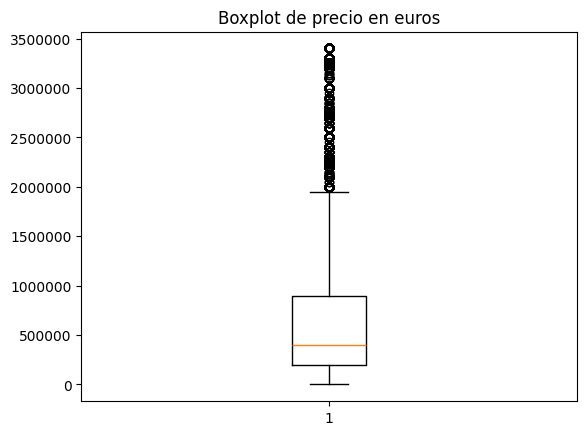

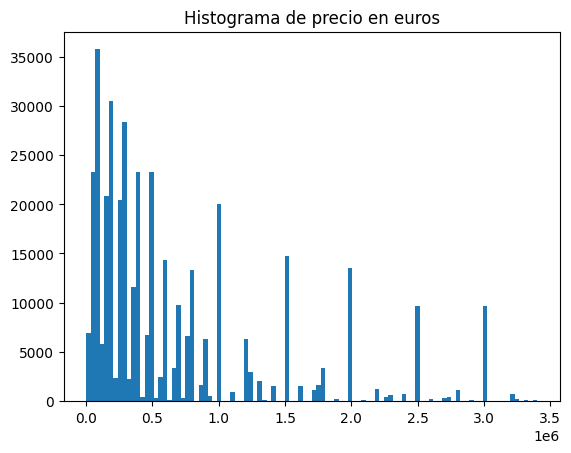

In [14]:
plt.ticklabel_format(style='plain', axis='y')

plt.boxplot(df_filtrado['precio_en_euros'])
plt.title('Boxplot de precio en euros')
plt.show()

plt.hist(df_filtrado['precio_en_euros'], bins=100)
plt.title('Histograma de precio en euros')
plt.show()

